# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

<IPython.core.display.Javascript object>


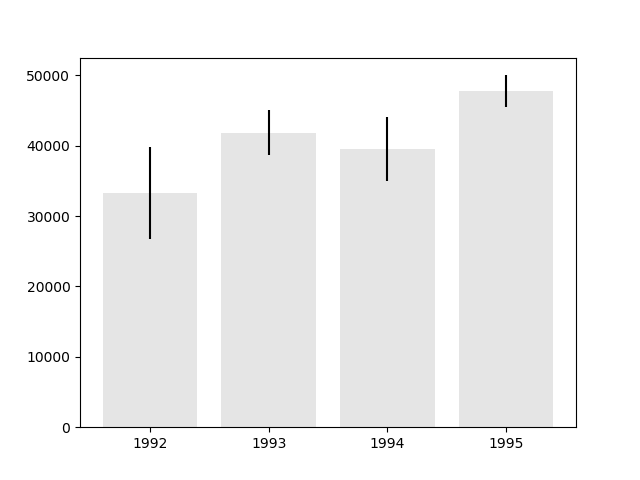

In [1]:
# Use the following data for this assignment:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.colors as col
import matplotlib.cm as cm

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

## First we calculate the means and confidence intervals for each distribution in our df

n = len(df.columns)
ci = []
means = []
stds = []

for i in range(len(df)):
    mean = df.iloc[i].mean()
    std = df.iloc[i].std()
    low = mean - 1.96 * (std/np.sqrt(n))
    high = mean + 1.96 * (std/np.sqrt(n))
    cii = [low,high]
    ci.append(cii)
    means.append(mean)
    stds.append(std)

norm_dists = list(zip(means, stds))

# ----------------------------------------------------------------------------------------------------------------------
# Just for the record and for future use I learnt an easier way to calculate the confidence intervals. It would be with  a 
# built-in function within the stats library from scipy module, but we will stick to the already applied method, as it 
# gives almost the same results

## ci = [stats.norm.interval(0.95, loc=mu, scale=se) for mu, se in zip(means, stds/np.sqrt(n))]

# ----------------------------------------------------------------------------------------------------------------------

# Now we ca graph a simple bar chart with the confidence interval bars also plotted for each mean
y_r = [means[i] - ci[i][1] for i in range(len(ci))]
plt.bar(range(len(means)), means, color = 'gray' , yerr=y_r, alpha=0.2, align='center')
plt.xticks(range(len(means)), [str(year) for year in range(df.index.tolist()[0], df.index.tolist()[-1]+1)])
plt.show()



# Easiest option

Which value would you like to check? 41000


<IPython.core.display.Javascript object>


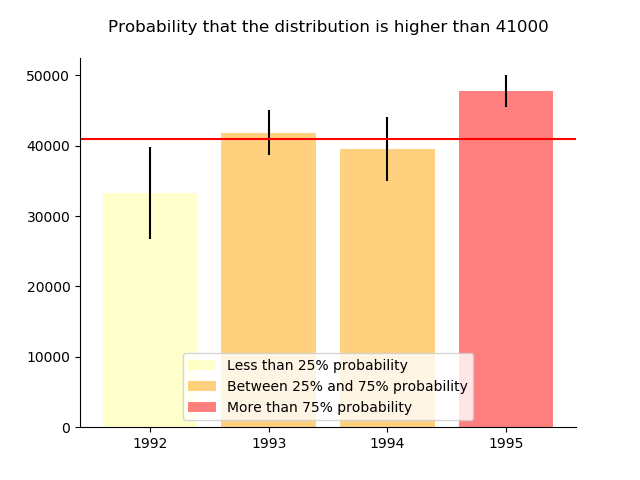

In [2]:

# Now, given a y value, the goal is to color the bars according to the probability that the distributions are greater than this 
# y value. We will start with the simplest way, coloring the bars with three colors: 

#   - Yellow if the prob is less than 25%
#   - Orange if the prob is between 25% and 75%
#   - Red if the prob is greater than 75%

# We use an input to ask the user which value he/she wants to check
given_y = int(input('Which value would you like to check? '))


# We calculate the probabilities that each distribution is greater than the given y value using the stats module from scipy library
# and the cdf (cummulative density function) from there:
probs = []
for m,s in norm_dists:
    prob = (1 - stats.norm.cdf(given_y, loc=m, scale=s/np.sqrt(n))) * 100
    probs.append(prob)

plt.figure()
# Now we can use our given y value and the associated probabilities to color our graph
for i in range(len(df.index)):
    if probs[i] <= 25:
        plt.bar(np.arange(i,i+1), means[i], color = 'yellow', yerr=y_r[i], align='center', alpha=0.2, label = 'Less than 25% probability')
    elif (probs[i] > 25) & (probs[i] <= 75):
        plt.bar(np.arange(i,i+1), means[i], color = 'orange', yerr=y_r[i], align='center', alpha=0.5, label = 'Between 25% and 75% probability')
    else:
        plt.bar(np.arange(i,i+1), means[i], color = 'red', yerr=y_r[i], align='center',alpha=0.5, label = 'More than 75% probability')

plt.axhline(y=given_y, color='r', linestyle='-')
plt.xticks(range(len(means)), [str(year) for year in range(df.index.tolist()[0], df.index.tolist()[-1]+1)])
plt.title('Probability that the distribution is higher than {}\n'.format(given_y))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc=8)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()


# Harder option

Which value would you like to check? 41000


<IPython.core.display.Javascript object>


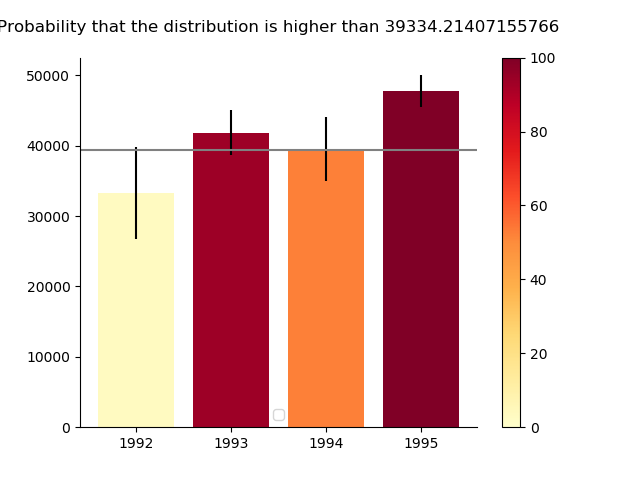

In [7]:
# Now we do the same exercise, but instead of setting just three colors (yellow, orange or red), we set a range of colors 
# based on a colormap

# We use an input to ask the user which value he/she wants to check
given_y = int(input('Which value would you like to check? '))


# We calculate the probabilities that each distribution is greater than the given y value using the stats module from scipy library
# and the cdf (cummulative density function) from there:
probs = []
for m,s in norm_dists:
    prob = (1 - stats.norm.cdf(given_y, loc=m, scale=s/np.sqrt(n))) * 100
    probs.append(prob)

# Setup the colormap
cmap = cm.get_cmap('YlOrRd')
cpick = cm.ScalarMappable(cmap=cmap, norm=col.Normalize(vmin=0, vmax=100.0))
cpick.set_array([])

plt.figure()
# Now we can use our given y value and the associated probabilities to color our graph
for i in range(len(df.index)):
    plt.bar(np.arange(i,i+1), means[i], color = cpick.to_rgba(probs[i]), yerr=y_r[i], align='center')#, alpha=0.2, label = 'Less than 25% probability')

plt.axhline(y=given_y, color='gray', linestyle='-')
plt.xticks(range(len(means)), [str(year) for year in range(df.index.tolist()[0], df.index.tolist()[-1]+1)])
plt.title('Probability that the distribution is higher than {}\n'.format(given_y))
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys(), loc=8)
plt.colorbar(cpick, orientation="vertical")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()



# Even harder option

In [8]:

# Now, using as a basis the code from the previous cell, we will attempt to make the y value interactive, trying to allow the user 
# to set this y value directly in the graph by just clicking on the y value which the user wants to check

# We use the event 'button_press_event', which takes the click of the mouse on the graphic and we will get the y value 
# from there. To try it please run the cell above first to generate the graph (if this has not been done yet), 
# then run this cell and finally place the mouse on the above graph and click where wished

def mouse(event):
    plt.cla()
    
    probs = []
    for m,s in norm_dists:
        prob = (1 - stats.norm.cdf(event.ydata, loc=m, scale=s/np.sqrt(n))) * 100
        probs.append(prob)
        
    for i in range(len(df.index)):
        plt.bar(np.arange(i,i+1), means[i], color = cpick.to_rgba(probs[i]), yerr=y_r[i], align='center')

    plt.xticks(range(len(means)), [str(year) for year in range(df.index.tolist()[0], df.index.tolist()[-1]+1)])
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys(), loc=8)
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().set_title('Probability that the distribution is higher than {}\n'.format(event.ydata))
    plt.axhline(y=event.ydata, color='gray', linestyle='-')
       
# Finally the connection between event and function needs to be made:
plt.gcf().canvas.mpl_connect('button_press_event', mouse)


### ----------------------------------------------------------------------------------------------------------------------------------
# This as not asked in the exercise, but I tried another experimentation with a different event, in this case the event is the movement 
# of the mouse, so a click is not needed.If you want to try this, please comment the avobe line with the button_press_event 
# (plt.gcf().canvas.mpl_connect('button_press_event', mouse)) and comment out the last line of this cell, then run this cell again

# ATTENTION: this works a bit slowly (not sure if it is due to optimization within my function)
# To try it please run the cell above first to generate the graph (if this has not been done yet), 
# then run this cell and finally place the mouse on the above graph and leave it there for a couple of seconds (no need to click, 
# just place the mouse). As explained, it works a bit slowly

## --- LINE TO COMMENT OUT IF WANTED TO TRY --->  plt.gcf().canvas.mpl_connect('motion_notify_event', mouse)


7